In [1]:
#pip install -U matplotlib

In [105]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [3]:
kickstart_data = pd.read_csv("KickstarterData_Facts.csv")

In [4]:
kickstart = pd.DataFrame(kickstart_data)

In [5]:
#Data Cleaning and EDA

In [6]:
len(kickstart)

10000

In [7]:
len(kickstart.columns)

12

In [8]:
kickstart.shape

(10000, 12)

In [9]:
kickstart.size

120000

In [10]:
kickstart.head()

,Donate ID,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
0,1,7/1/2019,female,100,white,4,vanilla,yes,<50K,yes,7,0
1,2,7/1/2019,female,100,blue,5,vanilla,yes,<50K,yes,5,1
2,3,7/1/2019,female,100,silver,6,vanilla,yes,<50K,yes,6,1
3,4,7/1/2019,female,100,silver,5,vanilla,yes,<50K,yes,5,1
4,5,7/1/2019,male,100,white,1,vanilla,yes,<50K,yes,7,0


In [11]:
kickstart.tail()

,Donate ID,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
9995,9996,7/9/2019,male,100,black,4,chocolate,no,Not Reported,no,5,1
9996,9997,7/9/2019,male,100,silver,6,no preference,yes,Not Reported,yes,6,0
9997,9998,7/9/2019,male,0,blue,3,chocolate,yes,Not Reported,yes,5,0
9998,9999,7/9/2019,male,0,blue,6,vanilla,no,Not Reported,no,6,0
9999,10000,7/9/2019,male,1,black,7,chocolate,yes,Not Reported,yes,7,0


In [12]:
kickstart.dtypes

Donate ID                                int64
Donate Date                             object
Gender                                  object
Deposit Amount                           int64
Preferred Color of Device               object
Ice Cream Products Consumed Per Week     int64
Favorite Flavor Of Ice Cream            object
Donated To Kick Starter Before          object
Household Income                        object
Do you own a Keurig                     object
How many desserts do you eat a week      int64
Purchased                                int64
dtype: object

In [13]:
kickstart.isnull().sum()

Donate ID                               0
Donate Date                             0
Gender                                  0
Deposit Amount                          0
Preferred Color of Device               0
Ice Cream Products Consumed Per Week    0
Favorite Flavor Of Ice Cream            0
Donated To Kick Starter Before          0
Household Income                        0
Do you own a Keurig                     0
How many desserts do you eat a week     0
Purchased                               0
dtype: int64

In [14]:
kickstart.nunique()

Donate ID                               10000
Donate Date                                 7
Gender                                      2
Deposit Amount                            302
Preferred Color of Device                   6
Ice Cream Products Consumed Per Week       11
Favorite Flavor Of Ice Cream                5
Donated To Kick Starter Before              2
Household Income                            4
Do you own a Keurig                         2
How many desserts do you eat a week        11
Purchased                                   2
dtype: int64

In [15]:
kickstart.describe()

,Donate ID,Deposit Amount,Ice Cream Products Consumed Per Week,How many desserts do you eat a week,Purchased
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,139.515800,4.962300,6.686800,0.651300
std,2886.89568,80.483091,3.165293,2.460592,0.476583
min,1.00000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,100.000000,2.000000,5.000000,0.000000
50%,5000.50000,100.000000,5.000000,7.000000,1.000000
75%,7500.25000,119.000000,8.000000,9.000000,1.000000
max,10000.00000,400.000000,10.000000,10.000000,1.000000


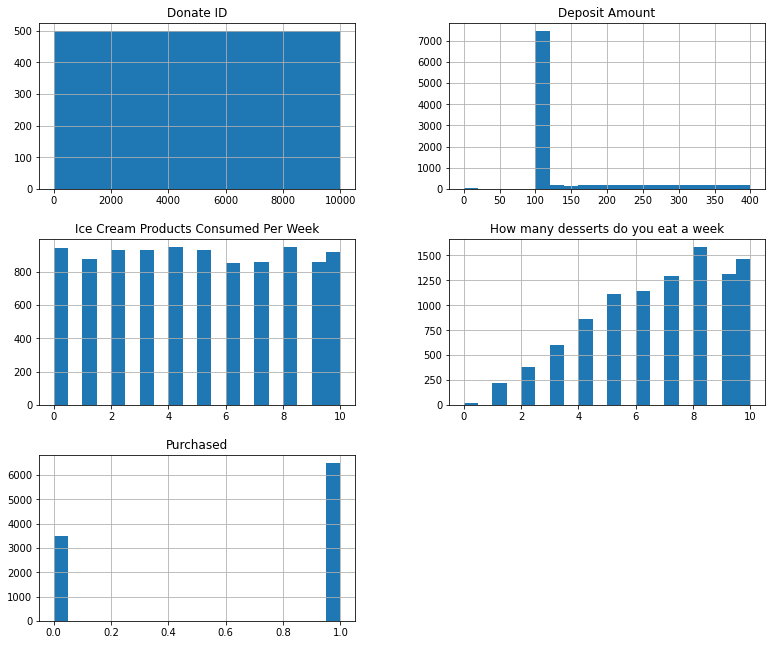

In [16]:
kickstart.hist(figsize=(13,11),bins=20)
plt.show()

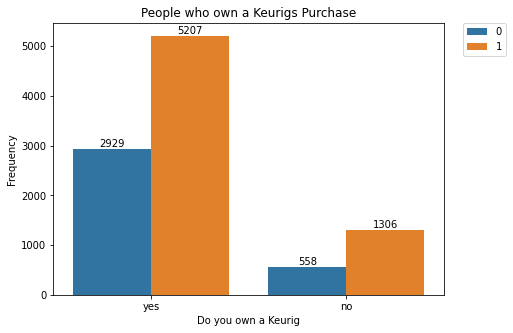

In [17]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
ax = sns.countplot('Do you own a Keurig',data = kickstart, hue ='Purchased' )
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Frequency")
plt.title("People who own a Keurigs Purchase")
plt.xlabel("Do you own a Keurig")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

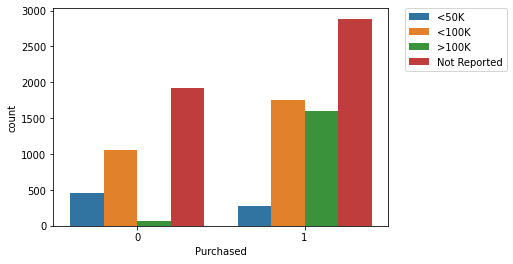

In [18]:
sns.countplot('Purchased',data = kickstart, hue ='Household Income' )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("People Household Income Purchase")

In [135]:
kickstart_g_100 = kickstart[(kickstart['Household Income'] == "<100K")]
kickstart_g_100.shape

(2806, 12)

Text(0.5, 1.0, 'How many desserts do you eat a week Purchase household inc >100K')

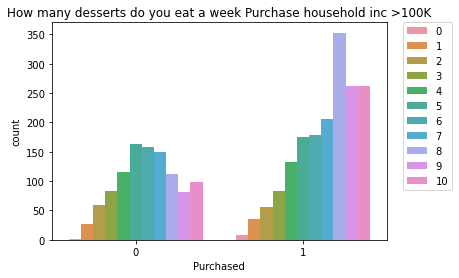

In [137]:
sns.countplot('Purchased',data = kickstart_g_100, hue ='How many desserts do you eat a week' )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("How many desserts do you eat a week Purchase household inc >100K")

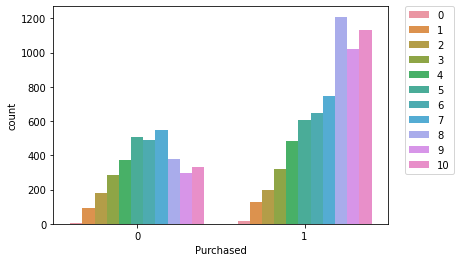

In [19]:
sns.countplot('Purchased',data = kickstart, hue ='How many desserts do you eat a week' )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("How many desserts do you eat a week Purchase")

In [65]:
kickstart_df = kickstart.copy()

In [66]:
kickstart_df=pd.get_dummies(kickstart_df,columns=['Gender','Preferred Color of Device', 'Favorite Flavor Of Ice Cream', 'Donated To Kick Starter Before', 'Do you own a Keurig', 'Household Income'])

In [67]:
kickstart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Donate ID                                   10000 non-null  int64 
 1   Donate Date                                 10000 non-null  object
 2   Deposit Amount                              10000 non-null  int64 
 3   Ice Cream Products Consumed Per Week        10000 non-null  int64 
 4   How many desserts do you eat a week         10000 non-null  int64 
 5   Purchased                                   10000 non-null  int64 
 6   Gender_female                               10000 non-null  uint8 
 7   Gender_male                                 10000 non-null  uint8 
 8   Preferred Color of Device_black             10000 non-null  uint8 
 9   Preferred Color of Device_blue              10000 non-null  uint8 
 10  Preferred Color of Devi

In [68]:
kickstart_df_corr =kickstart_df.drop(['Donate Date', 'Donate ID'],axis=1)

In [70]:
kickstar_corr=kickstart_df_corr.corr()

In [71]:
mask = np.triu(np.ones_like(kickstar_corr, dtype=bool))

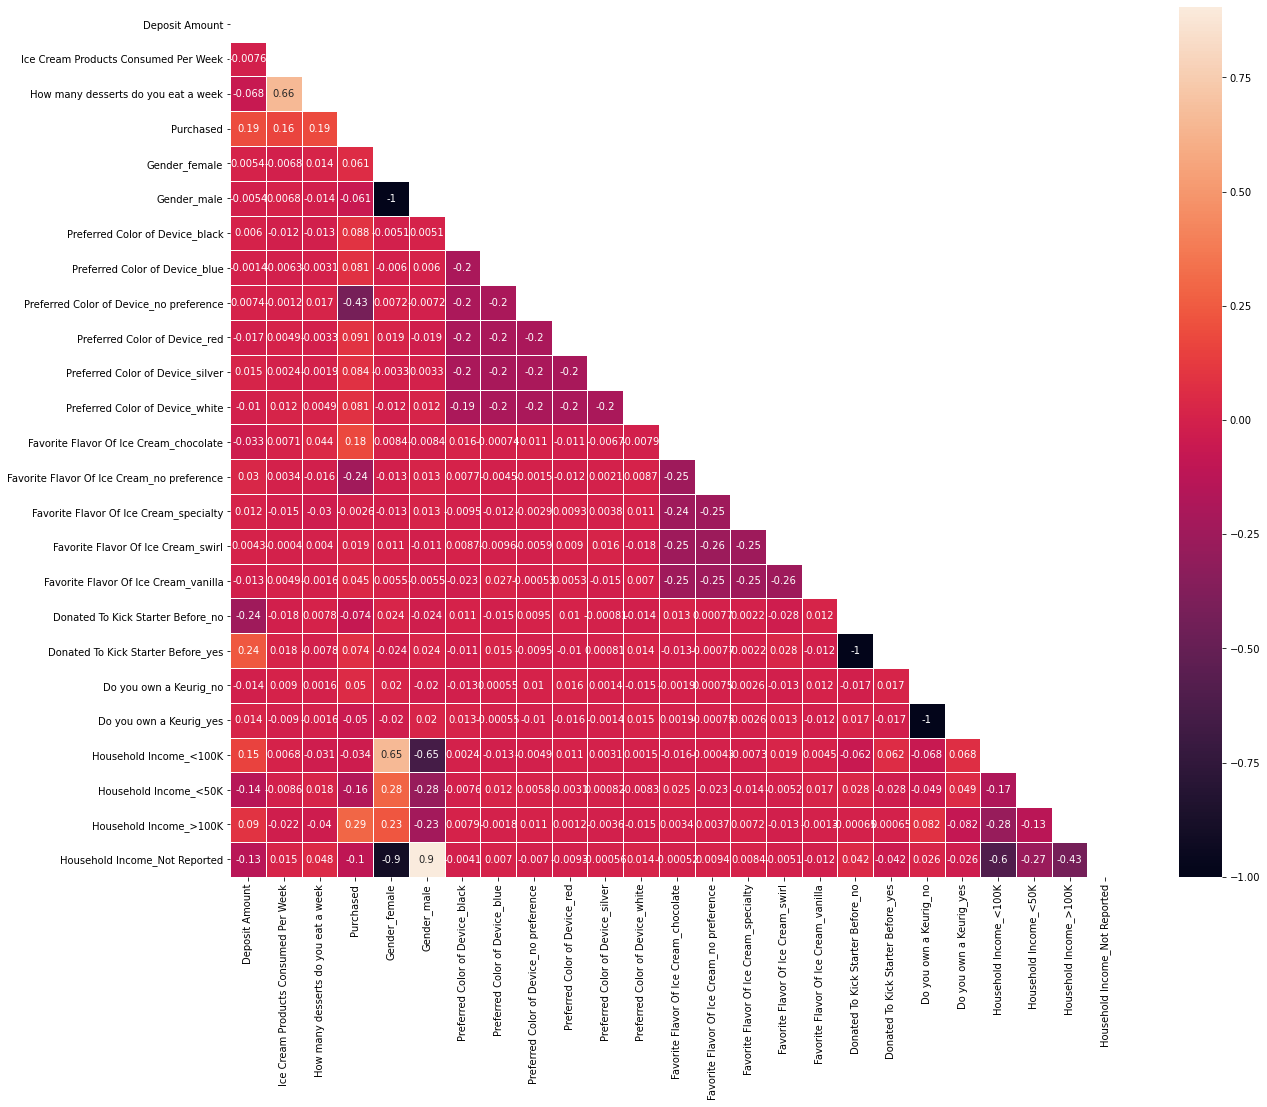

In [74]:
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(kickstar_corr, mask=mask, annot=True, linewidths=.8, ax=ax)
plt.show()


In [20]:
kickstart_log = kickstart.copy()

In [21]:
sum(kickstart_log.duplicated())

0

In [23]:
gender = pd.get_dummies(kickstart_log['Gender'],drop_first=True)

In [24]:
col_device = pd.get_dummies(kickstart_log['Preferred Color of Device'],drop_first=True)

In [25]:
fav_flavour = pd.get_dummies(kickstart_log['Favorite Flavor Of Ice Cream'],drop_first=True)

In [26]:
donated = pd.get_dummies(kickstart_log['Donated To Kick Starter Before'],drop_first=True)

In [27]:
household = pd.get_dummies(kickstart_log['Household Income'],drop_first=True)

In [28]:
own_k = pd.get_dummies(kickstart_log['Do you own a Keurig'],drop_first=True)

In [29]:
kickstart_log.drop(['Donate ID','Donate Date','Gender','Preferred Color of Device','Favorite Flavor Of Ice Cream','Donated To Kick Starter Before','Household Income','Do you own a Keurig'],axis=1,inplace=True)

In [30]:
kickstart_log = pd.concat([kickstart_log,gender,col_device,fav_flavour,donated,household,own_k],axis=1)

In [32]:
kickstart_log.head()

,Deposit Amount,Ice Cream Products Consumed Per Week,How many desserts do you eat a week,Purchased,male,blue,no preference,red,silver,white,no preference,specialty,swirl,vanilla,yes,<50K,>100K,Not Reported,yes
0,100,4,7,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1
1,100,5,5,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1
2,100,6,6,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1
3,100,5,5,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1
4,100,1,7,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,1


In [33]:
X_train, X_test, y_train, y_test = train_test_split(kickstart_log.drop('Purchased',axis=1), 
                                                    kickstart_log['Purchased'], test_size=0.30, 
                                                    random_state=101)

In [34]:
logmodel = LogisticRegression(max_iter=3000)


In [35]:
logmodel.fit(X_train,y_train)


LogisticRegression(max_iter=3000)

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1002
           1       0.88      0.91      0.89      1998

    accuracy                           0.85      3000
   macro avg       0.84      0.82      0.83      3000
weighted avg       0.85      0.85      0.85      3000



In [38]:
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[ 745,  257],
       [ 187, 1811]], dtype=int64)

<AxesSubplot:>

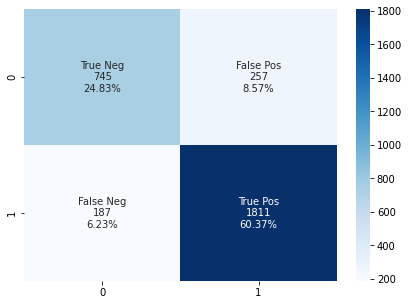

In [39]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.852
Precision: 0.875725338491296
Recall: 0.9064064064064065


In [ ]:
#decision tree

In [42]:
dec_cols = ['Gender','Preferred Color of Device','Favorite Flavor Of Ice Cream','Donated To Kick Starter Before','Household Income','Do you own a Keurig']

In [43]:
kickstart_dec = kickstart.copy()

In [44]:
decision_data =[]
for cnt,x in enumerate(dec_cols):
    col_data = {}
    uniq = kickstart_dec[x].nunique()
    col_namecol_datas = kickstart_dec[x].unique()
    for i in range(uniq):
        col_data[col_namecol_datas[i]] = i
    decision_data.append(col_data) 
      
print(decision_data)   

[{'female': 0, 'male': 1}, {'white': 0, 'blue': 1, 'silver': 2, 'black': 3, 'no preference': 4, 'red': 5}, {'vanilla': 0, 'swirl': 1, 'no preference': 2, 'chocolate': 3, 'specialty': 4}, {'yes': 0, 'no': 1}, {'<50K': 0, '<100K': 1, '>100K': 2, 'Not Reported': 3}, {'yes': 0, 'no': 1}]


In [45]:
count = 0
for value in decision_data:
    kickstart_dec[dec_cols[count]] = kickstart_dec[dec_cols[count]].map(value)
    count = count +1

In [46]:
kickstart_dec = kickstart_dec.drop(['Donate ID', 'Donate Date'], axis = 1)

In [47]:
kickstart_dec.head()

,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
0,0,100,0,4,0,0,0,0,7,0
1,0,100,1,5,0,0,0,0,5,1
2,0,100,2,6,0,0,0,0,6,1
3,0,100,2,5,0,0,0,0,5,1
4,1,100,0,1,0,0,0,0,7,0


In [48]:
target = kickstart_dec['Purchased']

In [49]:
kickstart_dec = kickstart_dec.drop('Purchased', axis = 1)

In [50]:
kickstart_dec.head()

,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week
0,0,100,0,4,0,0,0,0,7
1,0,100,1,5,0,0,0,0,5
2,0,100,2,6,0,0,0,0,6
3,0,100,2,5,0,0,0,0,5
4,1,100,0,1,0,0,0,0,7


In [51]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(kickstart_dec,target, test_size = 0.33)

In [52]:
#classifier = DecisionTreeClassifier(max_depth=3)

In [88]:
classifier = DecisionTreeClassifier(max_depth=3,ccp_alpha=0.01)

In [89]:
classifier.fit(X_train_d,y_train_d)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3)

In [90]:
classifier.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [91]:
dec_predict = classifier.predict(X_test_d)
dec_predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [92]:
print("Accuracy:",metrics.accuracy_score(y_test_d, dec_predict))
print("Precision:",metrics.precision_score(y_test_d, dec_predict))
print("Recall:",metrics.recall_score(y_test_d, dec_predict))

Accuracy: 0.75
Precision: 0.7411850236277717
Recall: 0.9474907063197026


In [93]:
cnf_matrix_d = metrics.confusion_matrix(y_test_d, dec_predict)
cnf_matrix_d

array([[ 436,  712],
       [ 113, 2039]], dtype=int64)

<AxesSubplot:>

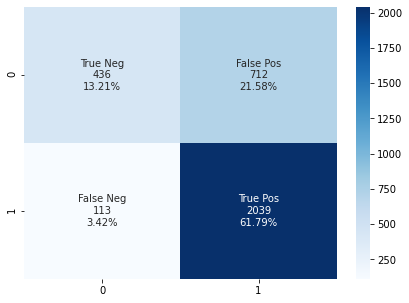

In [94]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names_d = ['True Neg','False Pos','False Neg','True Pos']
group_counts_d = ["{0:0.0f}".format(value) for value in
                cnf_matrix_d.flatten()]
group_percentages_d = ["{0:.2%}".format(value) for value in
                     cnf_matrix_d.flatten()/np.sum(cnf_matrix_d)]
labels_d = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_d,group_counts_d,group_percentages_d)]
labels_d = np.asarray(labels_d).reshape(2,2)
sns.heatmap(cnf_matrix_d, annot=labels_d, fmt='', cmap='Blues')

In [95]:
feature_names = kickstart_dec.columns
feature_names

Index(['Gender', 'Deposit Amount', 'Preferred Color of Device',
       'Ice Cream Products Consumed Per Week', 'Favorite Flavor Of Ice Cream',
       'Donated To Kick Starter Before', 'Household Income',
       'Do you own a Keurig', 'How many desserts do you eat a week'],
      dtype='object')

In [96]:
classifier.feature_importances_

array([0.        , 0.17943991, 0.59403427, 0.        , 0.        ,
       0.        , 0.07552822, 0.        , 0.1509976 ])

In [97]:
feature_importance = pd.DataFrame(classifier.feature_importances_, index= feature_names)
feature_importance

,0
Gender,0.000000
Deposit Amount,0.179440
Preferred Color of Device,0.594034
Ice Cream Products Consumed Per Week,0.000000
Favorite Flavor Of Ice Cream,0.000000
Donated To Kick Starter Before,0.000000
Household Income,0.075528
Do you own a Keurig,0.000000
How many desserts do you eat a week,0.150998


In [98]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['Deposit Amount',
 'Preferred Color of Device',
 'Household Income',
 'How many desserts do you eat a week']

<AxesSubplot:>

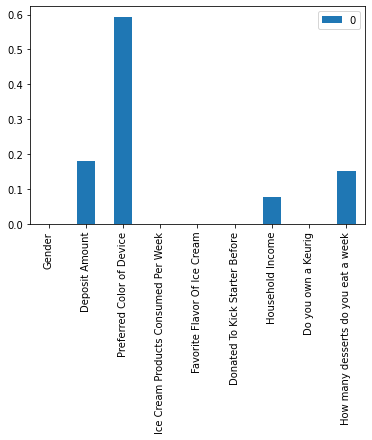

In [101]:
feature_importance.plot(kind='bar')

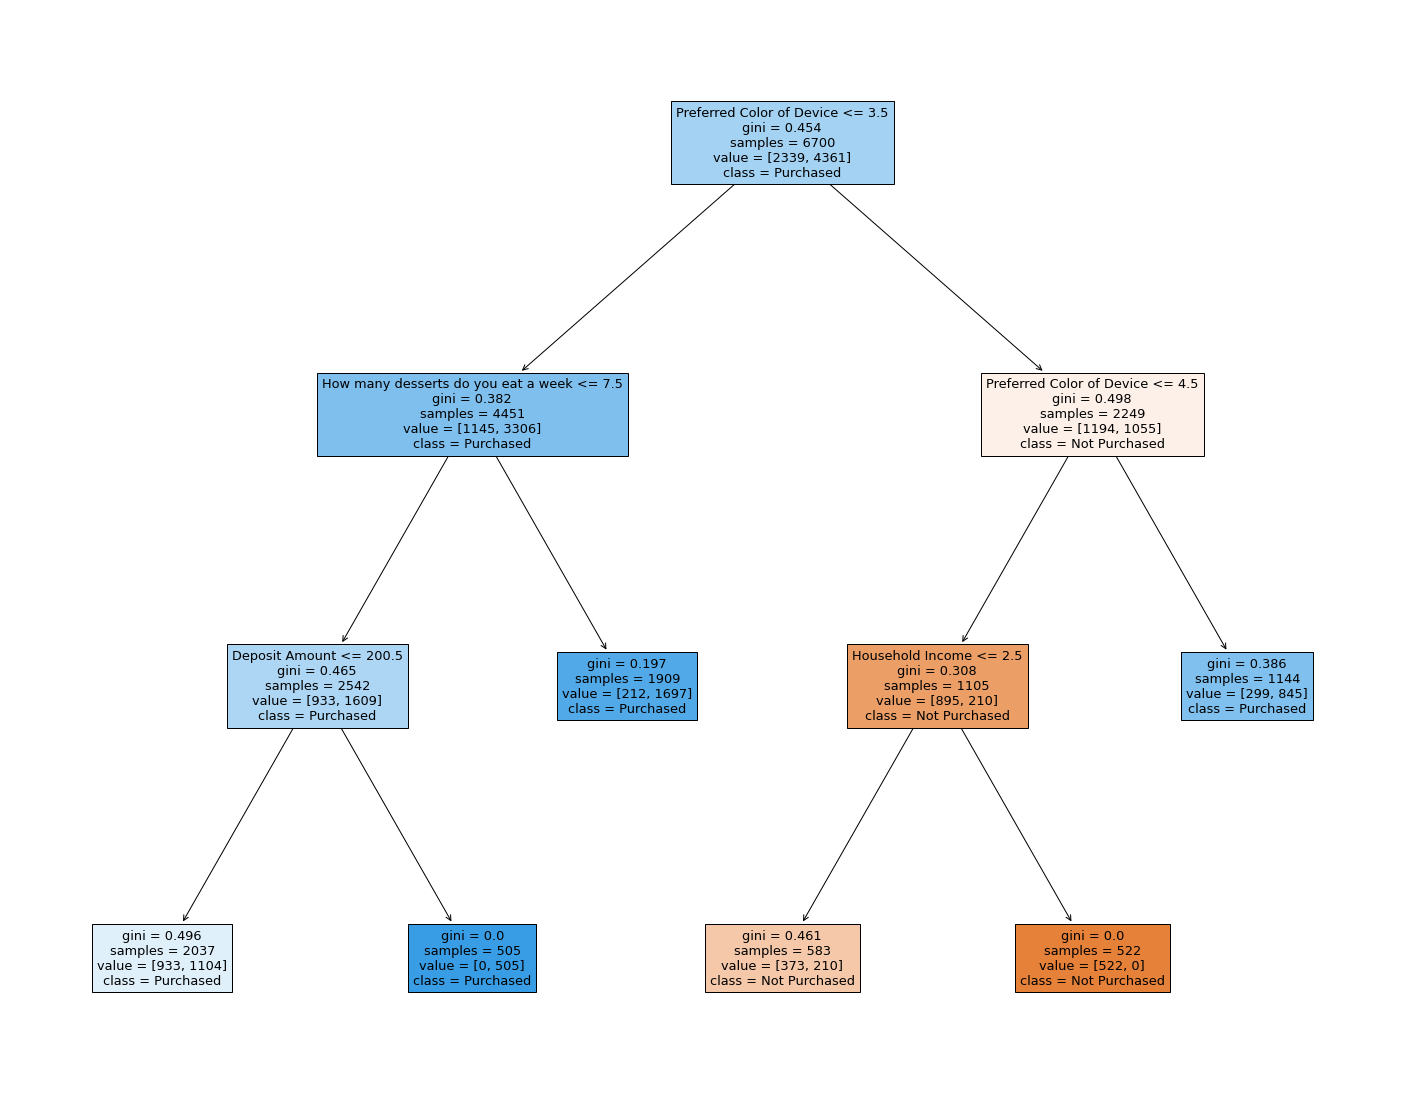

In [100]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=feature_names,  
                   class_names={0:'Not Purchased',1:'Purchased'},
                   filled=True)

In [115]:
kickstart_rand = kickstart_log.copy()

In [116]:
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(kickstart_rand.drop('Purchased',axis=1), 
                                                    kickstart_rand['Purchased'], test_size=0.30, 
                                                    random_state=101)

In [117]:
RandomForest = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 30)

In [118]:
RandomForest = RandomForest.fit(X_train_R, y_train_R)

In [119]:
Rand_Pred_Y = RandomForest.predict(X_test_R)

In [121]:
print("Accuracy:",metrics.accuracy_score(y_test_R, Rand_Pred_Y))
print("Precision:",metrics.precision_score(y_test_R, Rand_Pred_Y))
print("Recall:",metrics.recall_score(y_test_R, Rand_Pred_Y))

Accuracy: 0.8846666666666667
Precision: 0.9109452736318407
Recall: 0.9164164164164165


In [122]:
print(classification_report(y_test_R, Rand_Pred_Y))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1002
           1       0.91      0.92      0.91      1998

    accuracy                           0.88      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.88      0.88      0.88      3000



In [125]:
Rand_cnf = metrics.confusion_matrix(y_test_R, Rand_Pred_Y)
Rand_cnf

array([[ 823,  179],
       [ 167, 1831]], dtype=int64)

<AxesSubplot:>

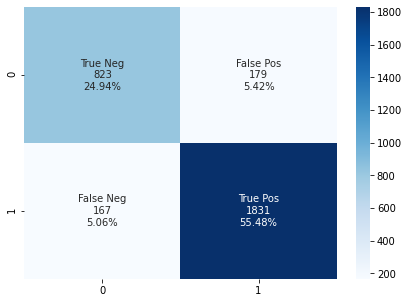

In [130]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names_d = ['True Neg','False Pos','False Neg','True Pos']
group_counts_d = ["{0:0.0f}".format(value) for value in
                aRand_cnf.flatten()]
group_percentages_d = ["{0:.2%}".format(value) for value in
                     Rand_cnf.flatten()/np.sum(cnf_matrix_d)]
labels_d = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_d,group_counts_d,group_percentages_d)]
labels_d = np.asarray(labels_d).reshape(2,2)
sns.heatmap(Rand_cnf, annot=labels_d, fmt='', cmap='Blues')

Text(0.5, 0, 'Feature Importance Random Forest')

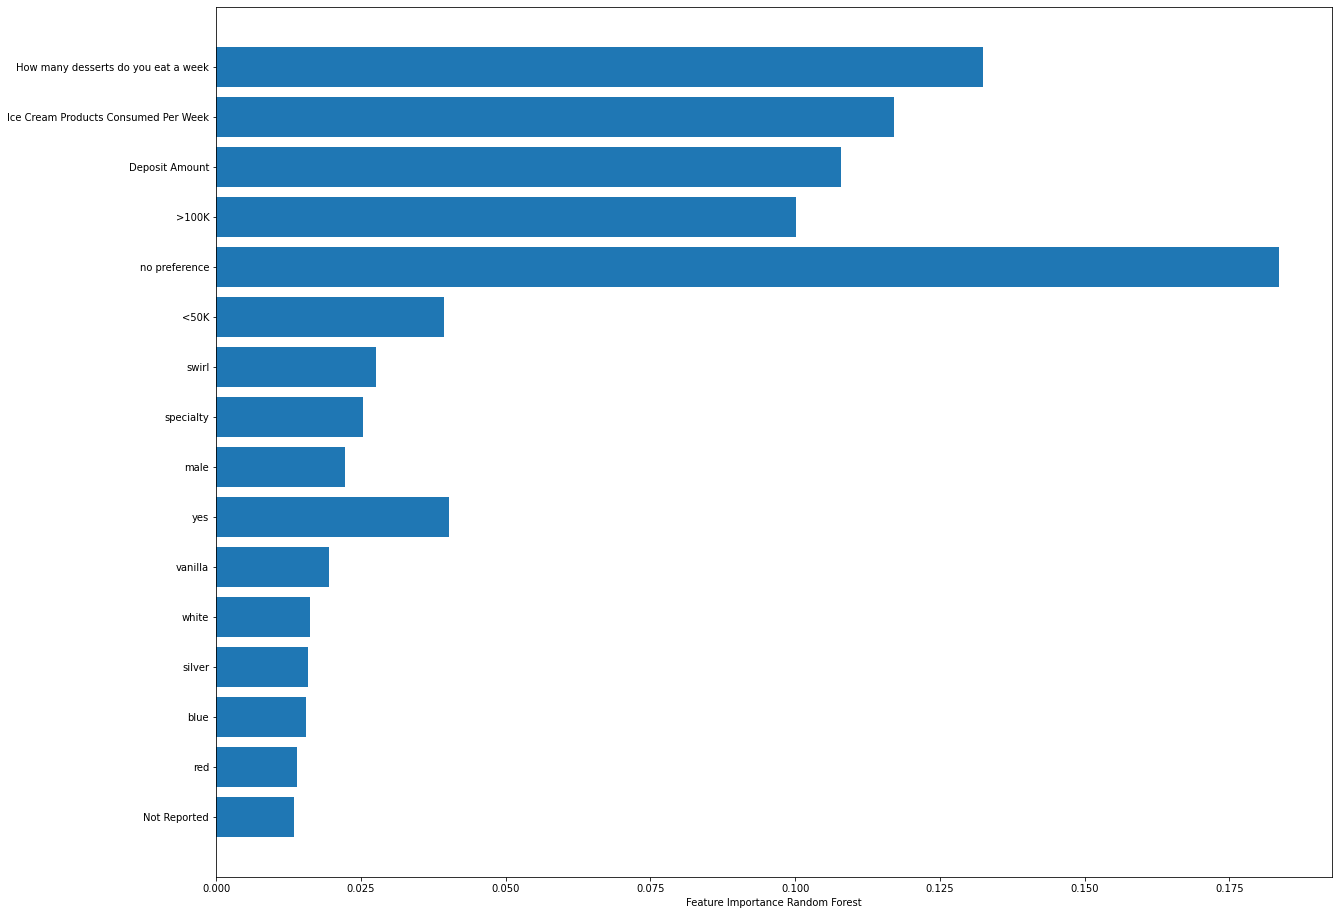

In [129]:
fig, ax = plt.subplots(figsize=(20,16))
sorted_idx = RandomForest.feature_importances_.argsort()
plt.barh(X_train_R.columns[sorted_idx], RandomForest.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance Random Forest")